<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_4_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv.zip to apps.csv.zip


In [3]:
import zipfile, re
import pandas as pd
import numpy as np
zip_path = "apps.csv.zip"
with zipfile.ZipFile(zip_path) as z:
    csv_name = [n for n in z.namelist() if n.lower().endswith(".csv")][0]
    df = pd.read_csv(z.open(csv_name))
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
def parse_size(s):
    """Convert app size to MB (float)."""
    if pd.isna(s): return np.nan
    s = str(s).strip()
    if s.lower().startswith("varies"): return np.nan
    s = s.replace(",", "").replace(" ", "")
    m = re.match(r"^([0-9.]+)([kKmM])?$", s)
    if not m:
        return np.nan
    val, unit = float(m.group(1)), m.group(2)
    if unit is None: return val
    if unit.lower() == "m": return val
    if unit.lower() == "k": return val / 1024
    return np.nan
def parse_installs(x):
    if pd.isna(x): return np.nan
    return pd.to_numeric(str(x).replace("+","").replace(",",""), errors="coerce")
def parse_price(x):
    if pd.isna(x): return 0.0
    return float(str(x).replace("$","").replace(",","") or 0)
if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
if "reviews" in df.columns:
    df["reviews"] = pd.to_numeric(df["reviews"].astype(str).str.replace(",",""), errors="coerce").fillna(0).astype(int)
if "size" in df.columns:
    df["size_mb"] = df["size"].apply(parse_size)
if "installs" in df.columns:
    df["installs_clean"] = df["installs"].apply(parse_installs)
if "price" in df.columns:
    df["price_usd"] = df["price"].apply(parse_price)
if "last_updated" in df.columns:
    df["last_updated"] = pd.to_datetime(df["last_updated"], errors="coerce")
if "category" in df.columns:
    df["category"] = df["category"].astype("category")
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows")
if "app" in df.columns:
    df = df[df["app"].notna()]
df.to_csv("apps_cleaned_preview.csv", index=False)
print(" Cleaned dataset saved as apps_cleaned_preview.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Dropped 0 duplicate rows
 Cleaned dataset saved as apps_cleaned_preview.csv
Shape: (9659, 17)
Columns: ['unnamed:_0', 'app', 'category', 'rating', 'reviews', 'size', 'installs', 'type', 'price', 'content_rating', 'genres', 'last_updated', 'current_ver', 'android_ver', 'size_mb', 'installs_clean', 'price_usd']


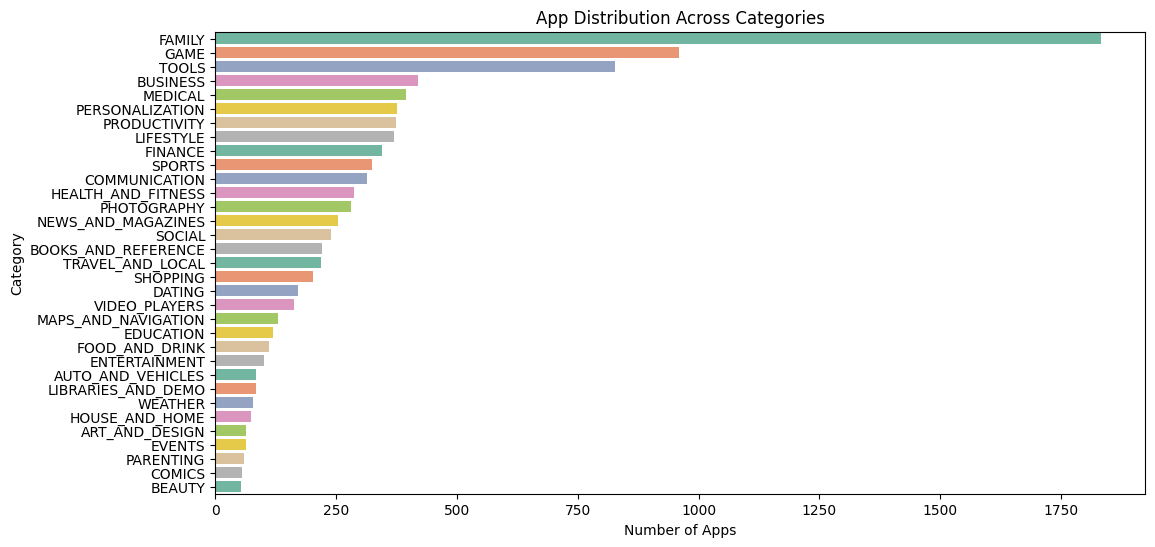

Top 10 Categories by App Count:
 category
FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: count, dtype: int64


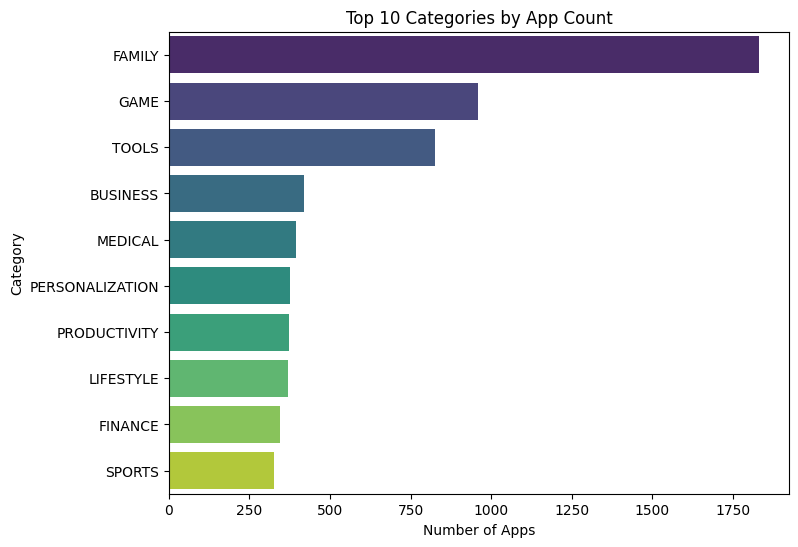

Top 10 Categories by Average Rating:
 category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
PARENTING              4.300000
BEAUTY                 4.278571
GAME                   4.247368
SOCIAL                 4.247291
WEATHER                4.243056
Name: rating, dtype: float64


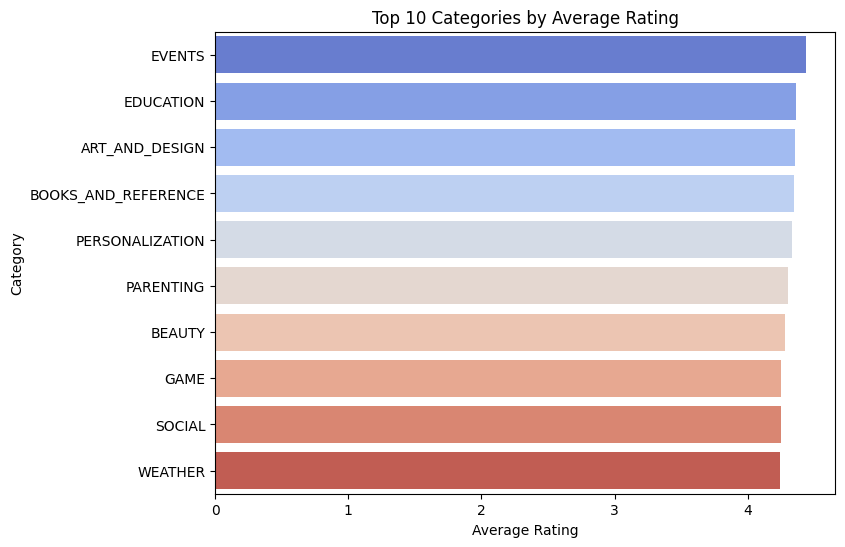

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("apps_cleaned_preview.csv")

plt.figure(figsize=(12,6))
sns.countplot(
    y="category",
    data=df,
    order=df["category"].value_counts().index,
    palette="Set2",
    legend=False
)
plt.title("App Distribution Across Categories")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()

top_categories = df["category"].value_counts().head(10)
print("Top 10 Categories by App Count:\n", top_categories)

plt.figure(figsize=(8,6))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Categories by App Count")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()

avg_rating = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(10)
print("Top 10 Categories by Average Rating:\n", avg_rating)

plt.figure(figsize=(8,6))
sns.barplot(
    x=avg_rating.values,
    y=avg_rating.index,
    palette="coolwarm",
    legend=False
)
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-274938416.py:7: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


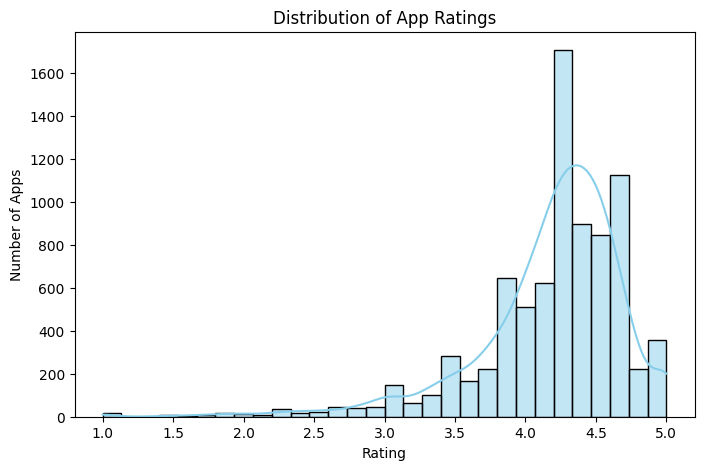

Average Rating: 4.17


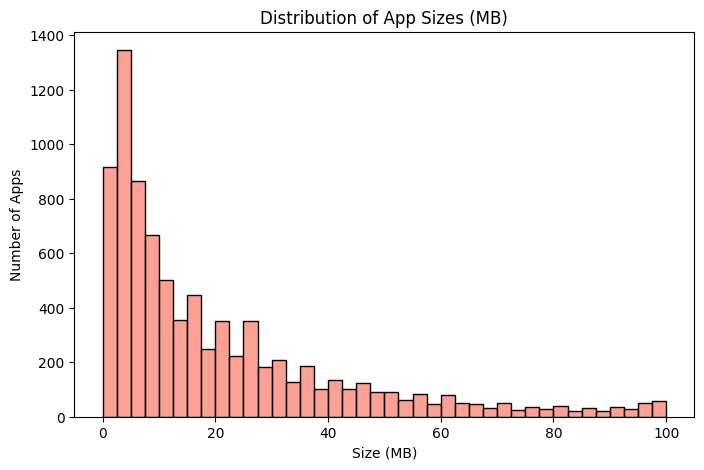

Average App Size (MB): 20.4


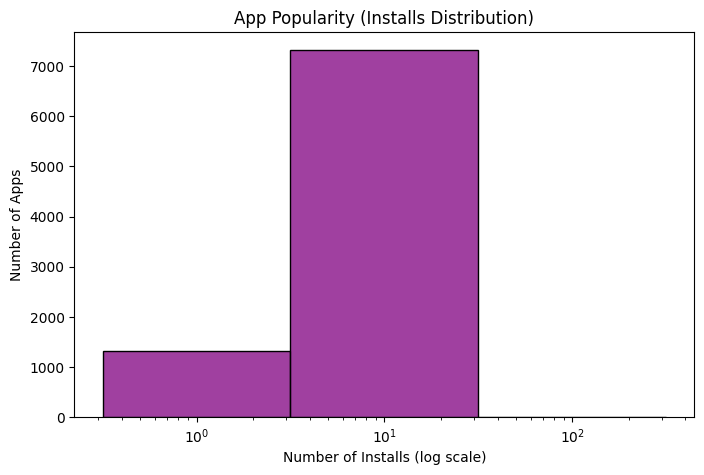

Top 10 Categories by Total Installs:
 category
PRODUCTIVITY           500,000,000+10,000,000+100,000,000+10,000,000+...
BEAUTY                 500,000+1,000,000+100,000+500,000+1,000,000+50...
WEATHER                50,000,000+1,000,000+50,000,000+10,000+10,000,...
PERSONALIZATION        50,000,000+1,000,000+100,000,000+5,000,000+100...
LIBRARIES_AND_DEMO     50,000+10,000+100,000+1,000+100,000+10,000+100...
LIFESTYLE              5,000,000+10,000,000+100,000+10,000,000+5,000,...
BOOKS_AND_REFERENCE    100,000,000+50,000+100,000+10,000,000+100,000,...
MAPS_AND_NAVIGATION    100,000,000+5,000,000+10,000,000+10,000,000+5,...
EDUCATION              100,000,000+10,000,000+100,000+5,000,000+10,00...
GAME                   100,000,000+1,000,000,000+500,000,000+10,000,0...
Name: installs, dtype: object


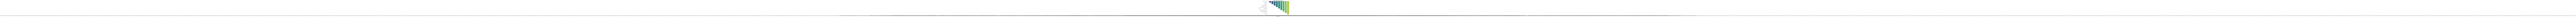

Free vs Paid Apps:
 type
Free    8903
Paid     756
Name: count, dtype: int64


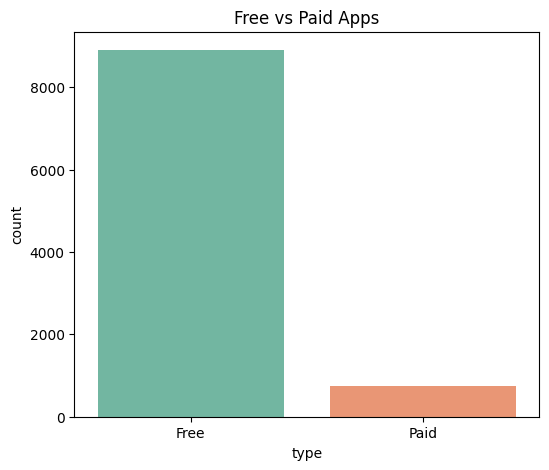

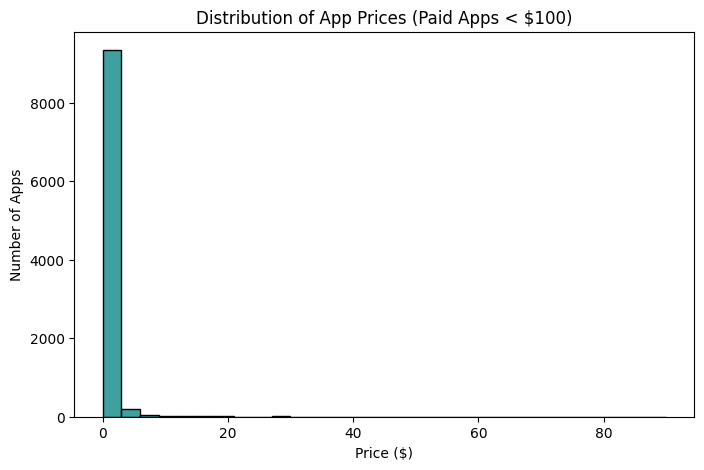

Average Paid App Price ($): 14.05


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("apps_cleaned_preview.csv")
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(8,5))
sns.histplot(df["rating"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()
print("Average Rating:", round(df["rating"].mean(), 2))
plt.figure(figsize=(8,5))
sns.histplot(df["size_mb"].dropna(), bins=40, color="salmon")
plt.title("Distribution of App Sizes (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Number of Apps")
plt.show()
print("Average App Size (MB):", round(df["size_mb"].mean(), 2))
plt.figure(figsize=(8,5))
sns.histplot(df["installs"].dropna(), bins=50, log_scale=(True, False), color="purple")
plt.title("App Popularity (Installs Distribution)")
plt.xlabel("Number of Installs (log scale)")
plt.ylabel("Number of Apps")
plt.show()
top_installed = df.groupby("category")["installs"].sum().sort_values(ascending=False).head(10)
print("Top 10 Categories by Total Installs:\n", top_installed)
plt.figure(figsize=(8,5))
sns.barplot(x=top_installed.values, y=top_installed.index, palette="viridis")
plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()
free_paid = df["type"].value_counts()
print("Free vs Paid Apps:\n", free_paid)
plt.figure(figsize=(6,5))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Free vs Paid Apps")
plt.show()
plt.figure(figsize=(8,5))
sns.histplot(df[df["price"] < 100]["price"].copy(), bins=30, color="teal")
plt.title("Distribution of App Prices (Paid Apps < $100)")
plt.xlabel("Price ($)")
plt.ylabel("Number of Apps")
plt.show()
print("Average Paid App Price ($):", round(df[df['price'] > 0]['price'].mean(), 2))


In [6]:
from google.colab import files
uploaded = files.upload()


Saving user_reviews.csv.zip to user_reviews.csv.zip


Dataset shape: (64295, 5)
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
Cleaned dataset shape: (37427, 5)


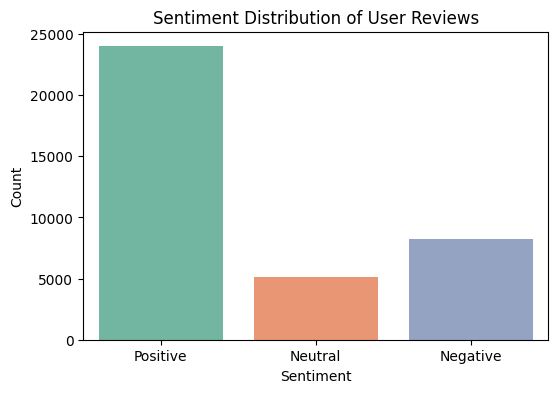

Sentiment Percentage:
 Sentiment
Positive    64.12
Negative    22.10
Neutral     13.78
Name: proportion, dtype: float64


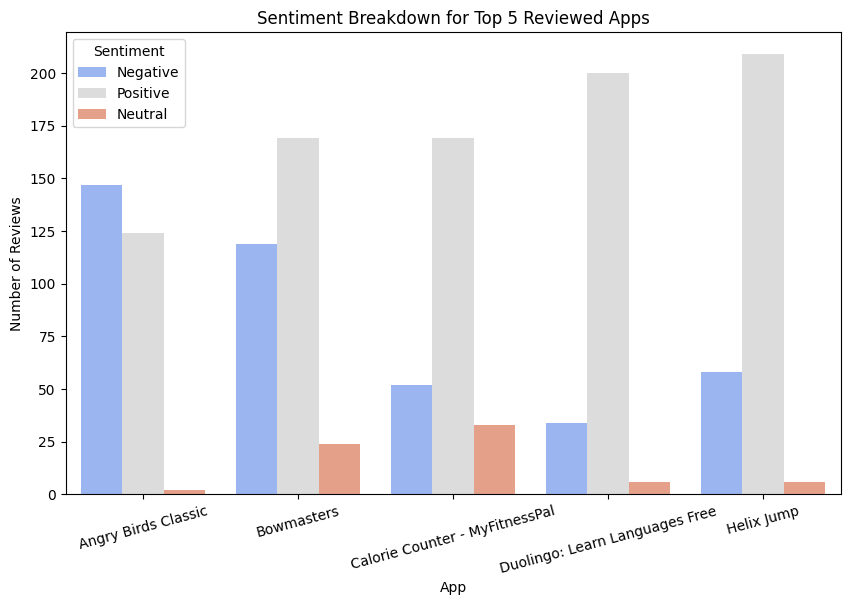

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df_reviews = pd.read_csv("user_reviews.csv.zip")
print("Dataset shape:", df_reviews.shape)
print(df_reviews.head())
df_reviews = df_reviews.dropna(subset=["Translated_Review", "Sentiment"])
df_reviews = df_reviews[df_reviews["Sentiment"].isin(["Positive", "Negative", "Neutral"])]
print("Cleaned dataset shape:", df_reviews.shape)
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df_reviews, palette="Set2")
plt.title("Sentiment Distribution of User Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
sentiment_percent = df_reviews["Sentiment"].value_counts(normalize=True) * 100
print("Sentiment Percentage:\n", sentiment_percent.round(2))
top_apps = df_reviews["App"].value_counts().head(5).index
subset = df_reviews[df_reviews["App"].isin(top_apps)]
plt.figure(figsize=(10,6))
sns.countplot(x="App", hue="Sentiment", data=subset, palette="coolwarm")
plt.title("Sentiment Breakdown for Top 5 Reviewed Apps")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=15)
plt.show()


In [8]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("apps.csv.zip")
df.drop_duplicates(inplace=True)
df.dropna(subset=["Rating"], inplace=True)
df["Installs"] = df["Installs"].astype(str).str.replace("[+,]", "", regex=True).astype(int)
df["Price"] = df["Price"].astype(str).str.replace("$", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce").fillna(0)
cat_counts = df["Category"].value_counts().reset_index()
cat_counts.columns = ["Category", "Count"]
fig1 = px.bar(
    cat_counts,
    x="Category", y="Count",
    title="📊 App Distribution Across Categories",
    labels={"Category": "App Category", "Count": "Number of Apps"},
    color="Category"
)
fig1.show()

